In [255]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# This is the library for the Reservoir Computing got it by: https://github.com/cknd/pyESN
from pyESN import ESN 
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

In [178]:




from_symbol = 'BTC'
to_symbol = 'USD'
exchange = 'Bitstamp'
datetime_interval = 'hour'

'''The cryptocompare api returns following columns:

    open, the price at which the period opened,
    high, the highest price reached during the period,
    low, the lowest price reached during the period,
    close, the price at which the period closed,
    volumefrom, the volume in the base currency that things are traded into,
    volumeto, the volume in the currency that is being traded.

We download the data and store it to a file.'''

import requests
from datetime import datetime


def get_filename(from_symbol, to_symbol, exchange, datetime_interval, download_date):
    return '%s_%s_%s_%s_%s.csv' % (from_symbol, to_symbol, exchange, datetime_interval, download_date)


def download_data(from_symbol, to_symbol, exchange, datetime_interval):
    supported_intervals = {'minute', 'hour', 'day'}
    assert datetime_interval in supported_intervals,\
        'datetime_interval should be one of %s' % supported_intervals

    print('Downloading %s trading data for %s %s from %s' %
          (datetime_interval, from_symbol, to_symbol, exchange))
    base_url = 'https://min-api.cryptocompare.com/data/histo'
    url = '%s%s' % (base_url, datetime_interval)

    params = {'fsym': from_symbol, 'tsym': to_symbol,
              'limit': 150, 'aggregate': 4,
              'e': exchange}
    request = requests.get(url, params=params)
    data = request.json()
    return data


def convert_to_dataframe(data):
    df = pd.io.json.json_normalize(data, ['Data'])
    df['datetime'] = pd.to_datetime(df.time, unit='s')
    df = df[['datetime', 'low', 'high', 'open',
             'close', 'volumefrom', 'volumeto']]
    return df


def filter_empty_datapoints(df):
    indices = df[df.sum(axis=1) == 0].index
    print('Filtering %d empty datapoints' % indices.shape[0])
    df = df.drop(indices)
    return df


data = download_data(from_symbol, to_symbol, exchange, datetime_interval)
df = convert_to_dataframe(data)
df = filter_empty_datapoints(df)

current_datetime = datetime.now().date().isoformat()
filename = get_filename(from_symbol, to_symbol, exchange, datetime_interval, current_datetime)
print('Saving data to %s' % filename)
df.to_csv(filename, index=False)


Filtering 0 empty datapoints
Saving data to BTC_USD_Bitstamp_hour_2019-09-10.csv


In [179]:

def read_dataset(filename):
    print('Reading data from %s' % filename)
    df = pd.read_csv(filename)
    df.datetime = pd.to_datetime(df.datetime) # change type from object to datetime
    df = df.set_index('datetime') 
    df = df.sort_index() # sort by datetime
    print(df.shape)
    return df

df = read_dataset(filename)

'''
df1 = df.groupby(pd.Grouper(freq='4h', closed='left')).agg({'low':'min',
                                                         'high':'max', 
                                                         'open':'first',
                                                         'close':'last',  
                                                          'volumefrom':'sum',
                                                         'volumeto':'sum'})
'''                                                   
                                                         





Reading data from BTC_USD_Bitstamp_hour_2019-09-10.csv
(151, 6)


"\ndf1 = df.groupby(pd.Grouper(freq='4h', closed='left')).agg({'low':'min',\n                                                         'high':'max', \n                                                         'open':'first',\n                                                         'close':'last',  \n                                                          'volumefrom':'sum',\n                                                         'volumeto':'sum'})\n"

In [177]:
df

,low,high,open,close,volumefrom,volumeto
datetime,,,,,,
2019-07-22 16:00:00,10052.25,10409.86,10223.90,10145.84,2478.82,25316569.83
2019-07-22 20:00:00,10086.95,10388.00,10145.84,10328.83,1061.86,10925523.35
2019-07-23 00:00:00,10189.23,10328.83,10328.83,10236.38,697.21,7141700.77
2019-07-23 04:00:00,9952.36,10236.38,10236.38,10014.88,2123.90,21397904.47
2019-07-23 08:00:00,9860.80,10078.32,10014.88,10013.31,2491.04,24834984.12
2019-07-23 12:00:00,9862.50,10072.41,10013.31,9941.75,1212.13,12075200.86
2019-07-23 16:00:00,9903.42,10156.09,9941.75,10133.07,1136.72,11430514.85
2019-07-23 20:00:00,9801.88,10222.21,10133.07,9847.02,1379.85,13787368.93
2019-07-24 00:00:00,9591.11,9854.00,9847.02,9636.85,1632.64,15805227.99


In [181]:
data = np.array(df1['close'])

In [121]:
import seaborn as sns
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=False)


In [184]:
n_reservoir= 500
sparsity=0.2
rand_seed=23
spectral_radius = 0.5
noise = .0001




esn = ESN(n_inputs = 1,
      n_outputs = 1, 
      n_reservoir = n_reservoir,
      sparsity=sparsity,
      random_state=rand_seed,
      spectral_radius = spectral_radius,
      noise=noise)

start =0
trainlen = 300
future = 1
futureTotal=10
pred_tot=np.zeros(futureTotal)

for i in range(start,futureTotal,future):
    pred_training = esn.fit(np.ones(trainlen),data[i:trainlen+i])
    prediction = esn.predict(np.ones(future))
    pred_tot[i:i+future] = prediction[:,0]
    
pred_training.shape


pred_tot

array([11228.93515503, 10974.81922747, 10371.10005699, 12158.39591396,
       12407.17094258, 11574.4331445 , 11122.74928145, 11769.16703257,
       11702.87563181, 11931.30286162])

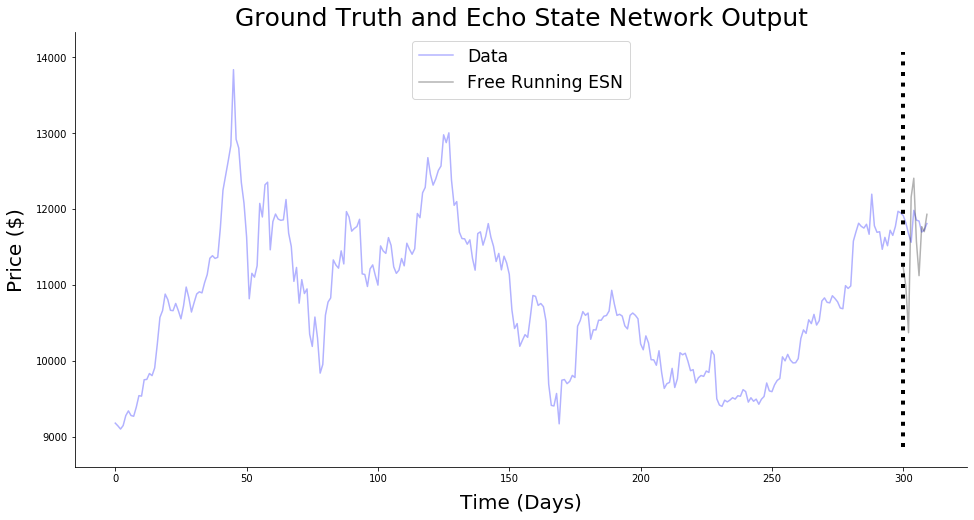

In [189]:
plt.figure(figsize=(16,8))

plt.plot(range(start,trainlen+futureTotal),data[start:trainlen+futureTotal],'r',label="Data", c = 'blue', alpha=0.3)
#plt.plot(range(0,trainlen),pred_training,'.g',  alpha=0.3)
plt.plot(range(trainlen,trainlen+futureTotal),pred_tot,'k',  alpha=0.3, label='Free Running ESN')

lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:', linewidth=4)

plt.title(r'Ground Truth and Echo State Network Output', fontsize=25 )
plt.xlabel(r'Time (Days)', fontsize=20,labelpad=10 )
plt.ylabel(r'Price ($)', fontsize=20,labelpad=10)
plt.legend(fontsize='xx-large', loc='best')
sns.despine()

In [256]:
        # Chart the BTC pricing data

days =  np.linspace(start, trainlen+futureTotal,trainlen+futureTotal+1)    




trace1 = go.Scatter(
    x = days, 
    y =data[start:trainlen+futureTotal])



trace2 = go.Scatter(
    x= x,
    y= avg1,
    mode='markers',
    marker=dict(
        size=2,
        color='cyan',
    ),
    name='MA360'
)



py.iplot([btc_trace])

The computational complexity for an RC is quite small comparing standard RNNs. The reason is that we essentially train only the the weights of the output layer, which is a linear layer, so the computational complexity is the same with a linear regression task. In particular, the training complexity is of the order O(N) where N is the number of hidden units located in the reservoir. This makes the training and the evaluation very fast.

 Part 2: Hyper-parameters optimization We are asking you to find the optimal values for spectral_radius, noise that gives the best prediction of this time series. In other words, we are looking for the hyper-parameters set that returns the minimum mean-square-error MSE. As previously, for each set of (spectral_radius, noise) you have to predict two time points ahead by using the previous 1500 points and do that for 100 steps as you did in part 1. These are essentially your validation set. Then calculate the MSE loss for the validation set and show through visualization which set gives the lowest MSE.

Hints:

Build a function for the MSE
Perform a grid search for the hyper parameters spectral_radius and noise
Use the ranges: spectrum_radius = [0.5, 1.5] and noise=[0.0001, 0.01]
For each set of (spectral_radius, noise) train the RC and make predictions as in part 1; these predictions are the validation sets
For each validation set calculate the MSE and store it
Make a 2D color plot to show the MSE for the different values of spectral_radius and noise

Build a function for the MSE


In [143]:
def MSE(yhat, y):
    return np.sqrt(np.mean((yhat.flatten() - y)**2))


Perform a grid search

In [144]:
n_reservoir= 500
sparsity   = 0.2
rand_seed  = 23
radius_set = [0.9,  1,  1.1]
noise_set = [ 0.001, 0.004, 0.006]

radius_set = [0.5, 0.7, 0.9,  1,  1.1,1.3,1.5]
noise_set = [ 0.0001, 0.0003,0.0007, 0.001, 0.003, 0.005, 0.007,0.01]



radius_set_size  = len(radius_set)
noise_set_size = len(noise_set)

trainlen = 150
future = 1
futureTotal= 10

loss = np.zeros([radius_set_size, noise_set_size])

for l in range(radius_set_size):
    rho = radius_set[l]
    for j in range(noise_set_size):
        noise = noise_set[j]

        pred_tot=np.zeros(futureTotal)

        esn = ESN(n_inputs = 1,
          n_outputs = 1, 
          n_reservoir = n_reservoir,
          sparsity=sparsity,
          random_state=rand_seed,
          spectral_radius = rho,
          noise=noise)

        for i in range(start,futureTotal,future):
            pred_training = esn.fit(np.ones(trainlen),data[i:trainlen+i])
            prediction = esn.predict(np.ones(future))
            pred_tot[i:i+future] = prediction[:,0]
        
        loss[l, j] = MSE(pred_tot, data[trainlen:trainlen+futureTotal])        
        print('rho = ', radius_set[l], ', noise = ', noise_set[j], ', MSE = ', loss[l][j] )

rho =  0.5 , noise =  0.0001 , MSE =  521.9046705842109
rho =  0.5 , noise =  0.0003 , MSE =  521.6229537783021
rho =  0.5 , noise =  0.0007 , MSE =  521.1985471698484
rho =  0.5 , noise =  0.001 , MSE =  521.0025997677703
rho =  0.5 , noise =  0.003 , MSE =  522.4016794882522
rho =  0.5 , noise =  0.005 , MSE =  528.4767052067215
rho =  0.5 , noise =  0.007 , MSE =  539.0061511612624
rho =  0.5 , noise =  0.01 , MSE =  562.1797528472073
rho =  0.7 , noise =  0.0001 , MSE =  696.9568522435475
rho =  0.7 , noise =  0.0003 , MSE =  696.9137092650542
rho =  0.7 , noise =  0.0007 , MSE =  696.9518488947319
rho =  0.7 , noise =  0.001 , MSE =  697.0894074841518
rho =  0.7 , noise =  0.003 , MSE =  700.37759564383
rho =  0.7 , noise =  0.005 , MSE =  707.6559167352691
rho =  0.7 , noise =  0.007 , MSE =  718.5841143146301
rho =  0.7 , noise =  0.01 , MSE =  740.703218077047
rho =  0.9 , noise =  0.0001 , MSE =  854.8287942775615
rho =  0.9 , noise =  0.0003 , MSE =  854.8669787689702
rho =  

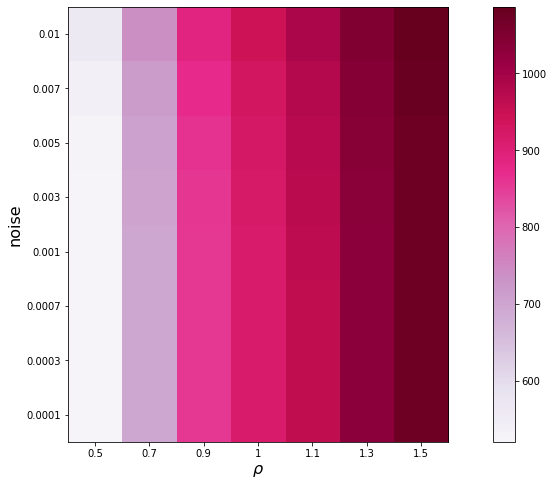

In [145]:
plt.figure(figsize=(16,8))
im = plt.imshow(loss.T, vmin=abs(loss).min(), vmax=abs(loss).max(), origin='lower',cmap='PuRd')
plt.xticks(np.linspace(0,radius_set_size-1,radius_set_size), radius_set);
plt.yticks(np.linspace(0,noise_set_size-1, noise_set_size), noise_set);
plt.xlabel(r'$\rho$', fontsize=16); plt.ylabel('noise', fontsize=16); 

# im.set_interpolation('bilinear')
cb = plt.colorbar(im);


What is the optimal set?

In [146]:
minLoss = np.min(loss)
index_min = np.where(loss == minLoss)
index_min
rho_opt = radius_set[int(index_min[0])]
noise_opt = noise_set[int(index_min[1])]
print('The optimal set is:\nspectrum radius = ',
      rho_opt,'\nnoise = ',noise_opt,'\nMSE = ',minLoss)

The optimal set is:
spectrum radius =  0.5 
noise =  0.001 
MSE =  521.0025997677703


In [147]:
n_reservoir= 500
sparsity=0.2
rand_seed=23
spectral_radius = 0.5
noise = .0001

# let k_set be an array with the prediction-window values
k_set = [1,2,5,10]

k_size = len(k_set)
loss_k = np.zeros(k_size)

for l in range(k_size):
    future = k_set[l]

    trainlen = 150    
    futureTotal=10
    
    pred_tot=np.zeros(futureTotal)

    esn = ESN(n_inputs = 1,
          n_outputs = 1, 
          n_reservoir = n_reservoir,
          sparsity=sparsity,
          random_state=rand_seed,
          spectral_radius = spectral_radius,
          noise=noise)


    for i in range(0,futureTotal,future):
        pred_training = esn.fit(np.ones(trainlen),data[i:trainlen+i])
        prediction = esn.predict(np.ones(future))
        pred_tot[i:i+future] = prediction[:,0]
        
    loss_k[l] = MSE(pred_tot, data[trainlen:trainlen+futureTotal])

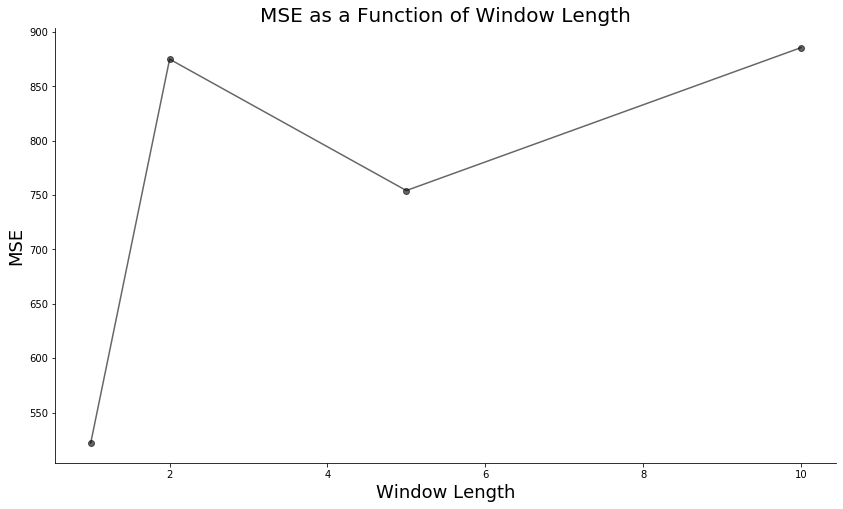

In [148]:
#Plot the MSE as a function of the prediction window


plt.figure(figsize=(14,8))
plt.plot(k_set, loss_k,'-ok', alpha=0.6)
plt.title('MSE as a Function of Window Length', fontsize=20)
plt.xlabel('Window Length', fontsize=18)
plt.ylabel('MSE', fontsize=18)
sns.despine()